# Case 3 : Game Recommender System
By: Felicia Audrey Tanujaya

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.sparse import hstack
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df= pd.read_csv('3A.tsv',sep='\t')
df.head()

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,-706.0,NaN,NaN
2,2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,-92.0,NaN,NaN


## Part A Exploratory Data Analysis

In [3]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16928 entries, 0 to 16927
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16928 non-null  int64  
 1   Name             16926 non-null  object 
 2   Platform         16928 non-null  object 
 3   Year_of_Release  16928 non-null  int64  
 4   Genre            16926 non-null  object 
 5   Publisher        16873 non-null  object 
 6   NA_Sales         16928 non-null  float64
 7   EU_Sales         16928 non-null  float64
 8   JP_Sales         16928 non-null  float64
 9   Other_Sales      16928 non-null  float64
 10  Global_Sales     16928 non-null  float64
 11  Critic_Score     8260 non-null   float64
 12  Critic_Count     8260 non-null   float64
 13  User_Score       10159 non-null  object 
 14  User_Count       16928 non-null  float64
 15  Developer        10240 non-null  object 
 16  Rating           10092 non-null  object 
dtypes: float64(8

,index,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16928.000000,16928.000000,16928.000000,16928.000000,16928.000000,16928.000000,16928.000000,8260.000000,8260.000000,16928.000000
mean,8463.500000,1974.215147,0.266390,0.146850,0.078170,0.047861,0.539520,69.037893,26.428692,-195.792120
std,4886.837014,252.128480,0.814326,0.504585,0.308756,0.186675,1.550545,13.943198,18.989929,545.393536
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,-1000.000000
25%,4231.750000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,-538.000000
50%,8463.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,22.000000,-82.000000
75%,12695.250000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.490000,79.000000,36.000000,21.000000
max,16927.000000,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [4]:
df.drop(['index'],axis=1,inplace=True)
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,-706.0,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,-92.0,NaN,NaN


In [5]:
#Create separate list for categorical and numerical columns
categorical = []
numerical = []

for i in df.columns:
    if df[i].dtype == 'object':
        categorical.append(i)
    else:
        numerical.append(i)

print(f'Categorical: {categorical}')
print(f'Numerical: {numerical}')

Categorical: ['Name', 'Platform', 'Genre', 'Publisher', 'User_Score', 'Developer', 'Rating']
Numerical: ['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Count']


In [6]:
for i in categorical:
    print(df[i].value_counts(),'\n')

Name
Need for Speed: Most Wanted                12
Madden NFL 07                              10
Ratatouille                                 9
LEGO Marvel Super Heroes                    9
LEGO Star Wars II: The Original Trilogy     9
                                           ..
NBA ShootOut 2003                           1
Saint Seiya: Sanctuary Battle               1
Deca Sports 3                               1
Valhalla Knights 2                          1
Haitaka no Psychedelica                     1
Name: count, Length: 11562, dtype: int64 

Platform
PS2     2188
DS      2164
PS3     1359
Wii     1337
X360    1280
PSP     1216
PS      1214
PC       982
GBA      839
XB       832
GC       564
3DS      530
PSV      436
PS4      399
N64      325
XOne     253
SNES     242
SAT      175
WiiU     148
2600     136
GB        99
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64 

Genre


In [7]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [8]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release       0
Genre                 2
Publisher            55
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8668
Critic_Count       8668
User_Score         6769
User_Count            0
Developer          6688
Rating             6836
dtype: int64

In [9]:
#Data cleaning, handling missing values
df['Publisher'].fillna('Unknown', inplace=True)
df['Rating'].fillna('Unrated', inplace=True)
df['User_Score'].replace('tbd', pd.NA, inplace=True)
df['User_Score'] = pd.to_numeric(df['User_Score'])
df.dropna(inplace=True)
df.isnull().sum()

C:\Users\Acer\AppData\Local\Temp\ipykernel_3156\1819790933.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Publisher'].fillna('Unknown', inplace=True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_3156\1819790933.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

For this case, I choose to do imputation and drop the NULL values. Name and Genre columns have relatively small number of NULLs but it's not reasonable to do mode imputation as these are important features and it'd be misleading for recommendations. For Publisher and Rating, I impute it with "Unknown" or "Unrated".Other columns like Critic Score and User Score are dropped due to huge amount of missing values which would be risky to impute.

In [10]:
#Dropping duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [11]:
#Create separate list for categorical and numerical columns
categorical = []
numerical = []

for i in df.columns:
    if df[i].dtype == 'object':
        categorical.append(i)
    else:
        numerical.append(i)

print(f'Categorical: {categorical}')
print(f'Numerical: {numerical}')

Categorical: ['Name', 'Platform', 'Genre', 'Publisher', 'Developer', 'Rating']
Numerical: ['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']


In [12]:
df.shape

(7016, 16)

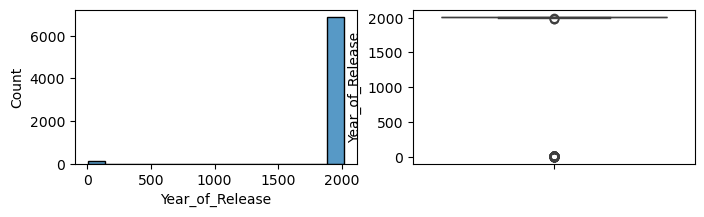

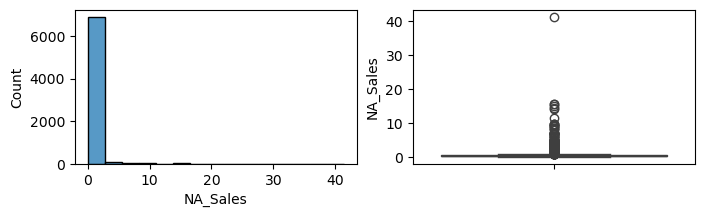

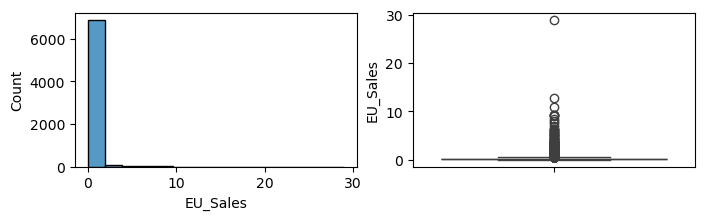

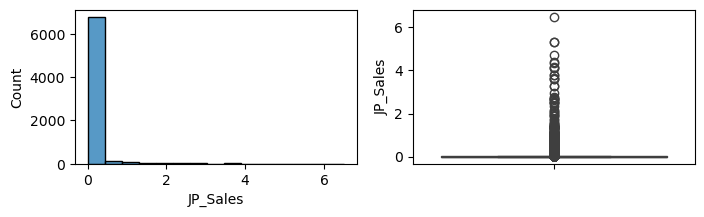

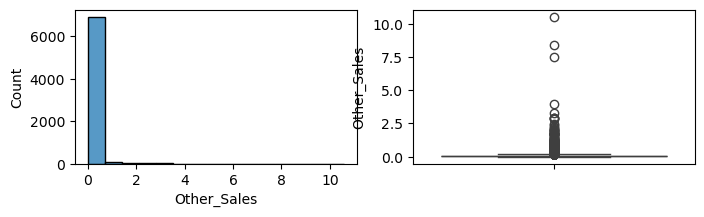

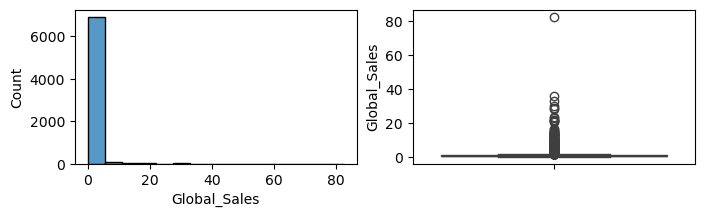

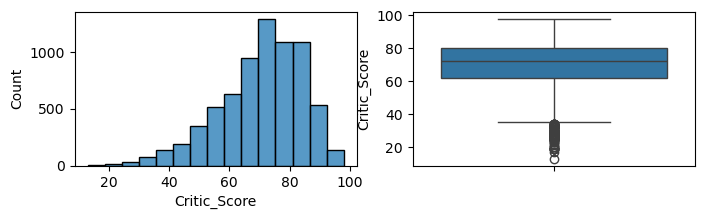

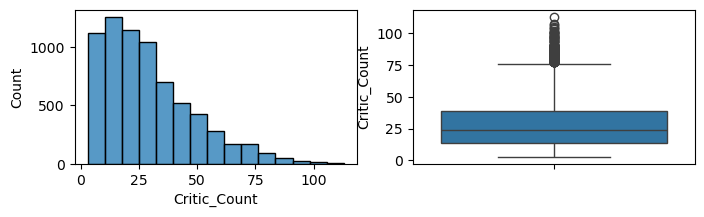

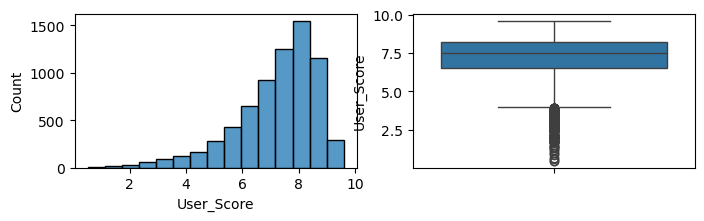

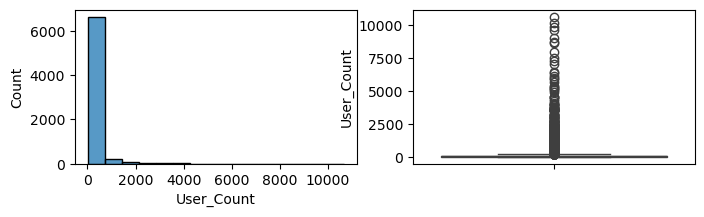

In [13]:
#Check distribution of all features
def check_dist(df, column):
    for i in column:
        plt.figure(figsize=(8,2))
        plt.subplot(1,2,1)
        sns.histplot(df[i], bins=15)

        plt.subplot(1,2,2)
        sns.boxplot(y=df[i])
        plt.show()

check_dist(df[numerical], numerical)

Anomaly found: there are entries with significant low value in year_release which doesn't make sense. This may present due to data inaccuracy and need to be handled

In [14]:
df = df[(df['Year_of_Release'] >= 1900) & (df['Year_of_Release'] <= 2025)]

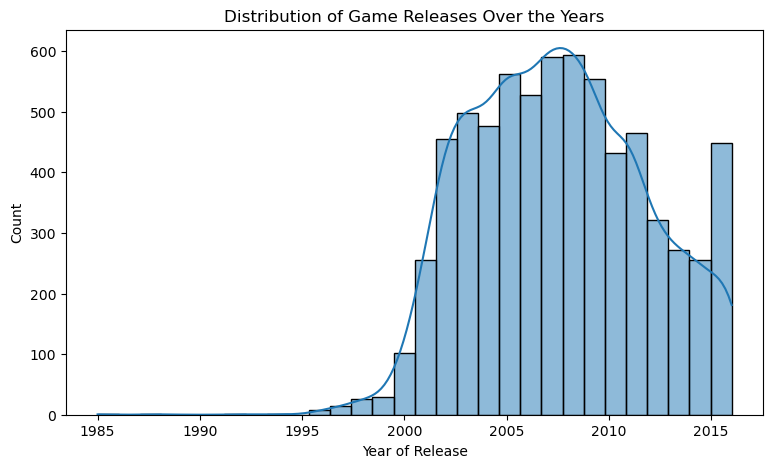

In [15]:
plt.figure(figsize=(9,5))
sns.histplot(df['Year_of_Release'].dropna(), bins=30, kde=True)
plt.title('Distribution of Game Releases Over the Years')
plt.xlabel('Year of Release')
plt.ylabel('Count')
plt.show()

The chart shows how game release peaked around 2005-2010 where gaming industry is rapidly growing.

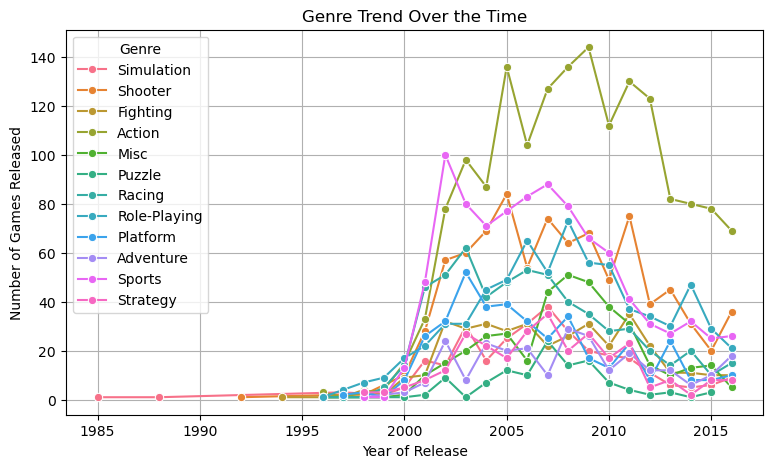

In [16]:
genre_year = df.groupby(['Year_of_Release', 'Genre']).size().reset_index(name='Count')
plt.figure(figsize=(9,5))
sns.lineplot(data=genre_year, x='Year_of_Release', y='Count', hue='Genre', marker='o')
plt.title('Genre Trend Over the Time')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games Released')
plt.legend(title='Genre')
plt.grid(True)
plt.show()


The chart shows that action games dominated game releases, especially peaking around 2005-2010, followed by steady growth in shooter and role playing games. Genres like Puzzle, Adventure, and Strategy maintained relatively lower and stable release numbers. Post 2010, there's a noticeable decline in game releases across all genre which might indicate the market saturation or shifting trend in gaming industry.

C:\Users\Acer\AppData\Local\Temp\ipykernel_3156\3499528983.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_developers.values, y=top5_developers.index, palette='viridis')


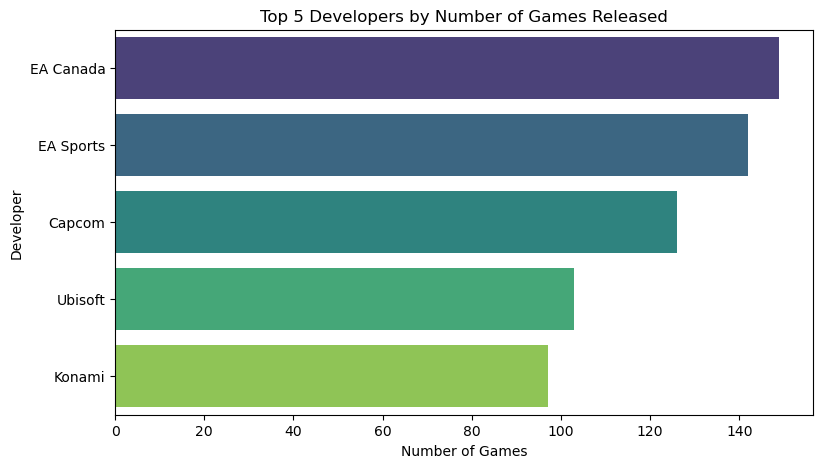

In [17]:
top5_developers = df['Developer'].value_counts().head(5)
plt.figure(figsize=(9,5))
sns.barplot(x=top5_developers.values, y=top5_developers.index, palette='viridis')
plt.title('Top 5 Developers by Number of Games Released')
plt.xlabel('Number of Games')
plt.ylabel('Developer')
plt.show()

EA Canada leads as game developer with over 140 releases followed by EA Sports, Capcom, Ubisoft, and Konami. This shows theirconsistent production in the gaming industry.

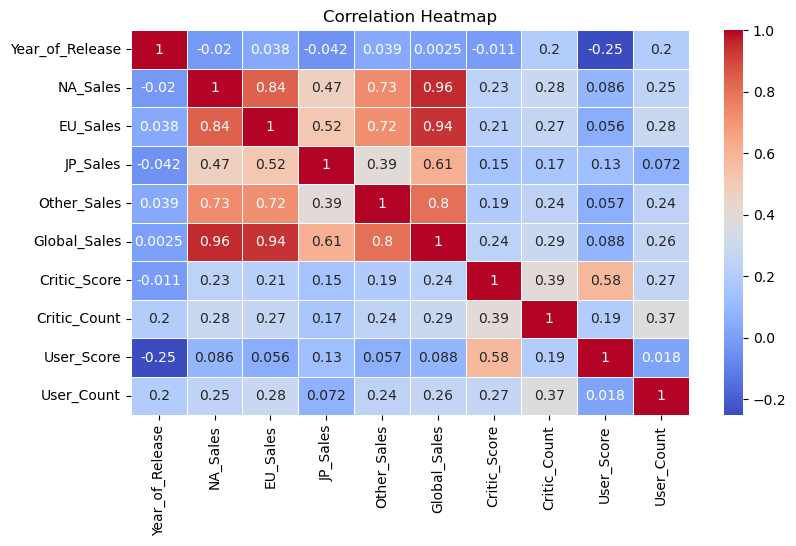

In [18]:
plt.figure(figsize=(9,5))
corr = df[numerical].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

This correlation map demonstrated how Global sales strongly correlate with North American (0.96) and European sales (0.94) which suggests that these regions significantly drive overall global sales. Critic scores and user scores also show moderate corre (0.58) which highlights how critics and users perspective aligns. Additionally, user scores show a weak negative correlation with the year of release (-0.25). This means that more recent games might receive slightly lower user ratings on average.

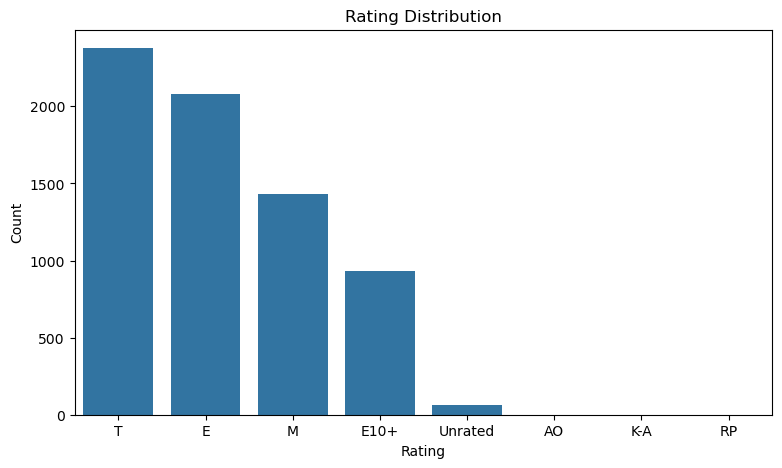

In [19]:
plt.figure(figsize=(9, 5))
sns.countplot(df, x='Rating', order=df['Rating'].value_counts().index)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

The majority of games are rated "E" (Everyone) and "T" (Teen) which indicates how the industry focus on family friendly and teenage audiences, while other ratings like "M" (Mature) etc are less common.

## Part B Recommendation System Model

In [20]:
def recommender_sys(df):
    df['features'] = (df['Genre'].astype(str) + ' ') * 4 + \
                     (df['Developer'].astype(str) + ' ') * 3 + \
                     (df['Rating'].astype(str) + ' ') + \
                     (df['Platform'].astype(str) + ' ')*2

    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform(df['features'])

    similarity = cosine_similarity(tfidf_matrix, tfidf_matrix)
    df = df.reset_index(drop=True)
    indices = pd.Series(df.index, index=df['Name']).to_dict()

    def recommend(game, top_n=5):
        if game not in df['Name'].values:
            return "Game not found."

        idx = indices[game]
        sim_scores = list(enumerate(similarity[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        topsimilar = sim_scores[1:top_n + 1]
        game_indices = [i[0] for i in topsimilar]
        similarity_scores = [i[1] for i in topsimilar]
        recommended_games = df[['Name', 'Genre', 'Platform', 'Rating', 'Developer']].iloc[game_indices].copy()
        recommended_games['Similarity Score'] = similarity_scores
        # return df['Name'].iloc[game_indices].tolist()
        return recommended_games.reset_index(drop=True)


    return recommend

recommend_game = recommender_sys(df)

For content based filtering, I only choose the features that describe the overall game content such as Genre, Platform, Rating, and Developer.

For this recommendation system, I enhance the recommendations by applying feature weighting by giving more importance to features that significantly impact game similarity. Specifically, I assigned higher weights to Genre and Developer since they directly influence gameplay and design, and lower weights on features like Platform, Publisher, and Rating.

## Part C Evaluation

In [21]:
recommend_game('Resident Evil 4')

,Name,Genre,Platform,Rating,Developer,Similarity Score
0,Devil May Cry 4,Action,PC,M,Capcom,1.000000
1,Resident Evil: Revelations,Action,PC,M,Capcom,1.000000
2,Resident Evil 4,Action,PC,M,Capcom,1.000000
3,Resident Evil 4,Action,PS2,M,Capcom,0.893357
4,Devil May Cry,Action,PS2,M,Capcom,0.893357


For the input Resident Evil 4, all of the recommended games share the same Genre (action), Rating (Mature), as well as Developer (Capcorn). This means that the recommender is effectively identifying games with similar gameplay and development style.

In [22]:
recommend_game('Animal Crossing')

,Name,Genre,Platform,Rating,Developer,Similarity Score
0,Animal Crossing: City Folk,Simulation,Wii,E,Nintendo,0.901245
1,Animal Crossing: Wild World,Simulation,DS,E,Nintendo,0.900531
2,Animal Crossing: New Leaf,Simulation,3DS,E,Nintendo,0.873581
3,Animal Crossing: Happy Home Designer,Simulation,3DS,E,Nintendo,0.873581
4,The Legend of Zelda: The Wind Waker,Action,GC,E,Nintendo,0.649512


For Animal Crossing, the system recommends games with similar Genre, Platform, Rating and Developer for the Animal Crossing Franchise. Additionally, it recommends other game from same developer (Nintendo) such as The Legend of Zelda: The Wind Waker which match the developer and rating but differ in genre and platform.

In [23]:
recommend_game('Final Fantasy IV')

,Name,Genre,Platform,Rating,Developer,Similarity Score
0,Final Fantasy III,Role-Playing,DS,E10+,Matrix Software,0.714199
1,Final Fantasy: The 4 Heroes of Light,Role-Playing,DS,E10+,Matrix Software,0.714199
2,Nostalgia,Role-Playing,DS,E10+,Matrix Software,0.714199
3,Alundra,Role-Playing,PS,T,Matrix Software,0.646500
4,Armored Core 2,Simulation,PS2,T,From Software,0.608242


For Final Fantasy IV, all recommended games belong to the Role Playing genre and are most are developed by Matrix Software. Games like Final Fantasy III and Final Fantasy: The 4 Heroes of Light are not only from the same developer (Matrix Software) but also share the same Platform (DS). Alundra, Nostalgia, And Armored Core 2 further shows the system's ability to identify games with similar gameplay mechanics and developer influence across different consoles.